<a href="https://colab.research.google.com/github/diao0014/Plotly-Dashboards-with-Dash/blob/master/Predictive_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import FeatureUnion
from sklearn.impute import MissingIndicator


In [ ]:
df = pd.read_csv("heloc_dataset_v1.csv")
df.head(5)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
0,Bad,55,144,4,84,20,3,0,83,2,...,43,0,0,0,33,-8,8,1,1,69
1,Bad,61,58,15,41,2,4,4,100,-7,...,67,0,0,0,0,-8,0,-8,-8,0
2,Bad,67,66,5,24,9,0,0,100,-7,...,44,0,4,4,53,66,4,2,1,86
3,Bad,66,169,1,73,28,1,1,93,76,...,57,0,5,4,72,83,6,4,3,91
4,Bad,81,333,27,132,12,0,0,100,-7,...,25,0,1,1,51,89,3,1,0,80


**1. Preprocessing**

In [ ]:

X = df.iloc[:,1:]
Y = (df.iloc[:,0]=='Bad').astype(int)
print(X.shape, Y.shape)

(10459, 23) (10459,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1234)

In [ ]:
df_train = pd.concat([X_train, Y_train], axis=1)
df_train.head(3)

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,RiskPerformance
7175,80,198,19,94,16,0,0,100,-7,7,...,0,0,0,25,-8,3,1,2,40,0
8239,81,141,3,59,34,1,0,97,54,6,...,0,1,1,4,94,2,2,0,44,0
4675,69,410,1,124,49,0,0,100,-7,7,...,1,1,1,41,15,11,2,1,58,1


In [ ]:
# you implemented similar code in the previous assignment
df_count_missing = pd.concat([(X_train==-7).sum(), (X_train==-8).sum(), (X_train==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]
df_count_missing

,-7,-8,-9
ExternalRiskEstimate,0,0,460
MSinceOldestTradeOpen,0,201,451
MSinceMostRecentTradeOpen,0,0,451
AverageMInFile,0,0,451
NumSatisfactoryTrades,0,0,451
NumTrades60Ever2DerogPubRec,0,0,451
NumTrades90Ever2DerogPubRec,0,0,451
PercentTradesNeverDelq,0,0,451
MSinceMostRecentDelq,3746,137,451
MaxDelq2PublicRecLast12M,0,0,451


In [ ]:
X_train = X_train[(X_train["ExternalRiskEstimate"]!=-9) &
                 (X_train["ExternalRiskEstimate"]!=-8) &
                 (X_train["ExternalRiskEstimate"]!=-7)]
X_test  = X_test[(X_test["ExternalRiskEstimate"]!=-9) &
                 (X_test["ExternalRiskEstimate"]!=-8) &
                 (X_test["ExternalRiskEstimate"]!=-7)]
Y_train = Y_train[X_train.index]
Y_test  = Y_test[X_test.index]
X_train

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,MaxDelq2PublicRecLast12M,...,PercentInstallTrades,MSinceMostRecentInqexcl7days,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance
7175,80,198,19,94,16,0,0,100,-7,7,...,25,0,0,0,25,-8,3,1,2,40
8239,81,141,3,59,34,1,0,97,54,6,...,51,0,1,1,4,94,2,2,0,44
4675,69,410,1,124,49,0,0,100,-7,7,...,23,1,1,1,41,15,11,2,1,58
2600,68,264,5,72,54,2,2,96,30,6,...,46,-7,1,1,18,83,4,7,1,50
1061,58,254,9,142,31,2,2,82,25,6,...,67,0,5,5,61,33,2,4,1,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6833,69,99,8,40,16,0,0,94,8,4,...,19,9,0,0,22,-8,5,-8,1,100
6137,76,393,1,112,40,0,0,100,-7,7,...,12,2,1,1,20,86,10,2,2,57
7540,63,176,3,69,10,9,9,77,12,6,...,46,0,2,1,89,-8,3,1,1,100
7221,62,161,1,60,16,1,0,79,4,4,...,16,0,1,1,20,25,4,2,0,47


In [ ]:
# you implemented similar code in the previous assignment
df_count_missing = pd.concat([(X_train==-7).sum(), (X_train==-8).sum(), (X_train==-9).sum()], axis=1)
df_count_missing.columns = [-7,-8,-9]
df_count_missing

,-7,-8,-9
ExternalRiskEstimate,0,0,0
MSinceOldestTradeOpen,0,201,0
MSinceMostRecentTradeOpen,0,0,0
AverageMInFile,0,0,0
NumSatisfactoryTrades,0,0,0
NumTrades60Ever2DerogPubRec,0,0,0
NumTrades90Ever2DerogPubRec,0,0,0
PercentTradesNeverDelq,0,0,0
MSinceMostRecentDelq,3740,137,0
MaxDelq2PublicRecLast12M,0,0,0


In [ ]:


do_nothing_imputer = ColumnTransformer([("Imputer -7 to mean", SimpleImputer(missing_values=-7, strategy='mean'), [])], remainder='passthrough')

feature_expansion = FeatureUnion([("do nothing", do_nothing_imputer),
                                  ("add features for -7", MissingIndicator(missing_values=-7, features='missing-only')),
                                  ("add features for -8", MissingIndicator(missing_values=-8, features='missing-only'))])




In [ ]:
scaler_transformer = ColumnTransformer([("standard scaler", StandardScaler(), slice(None, 23))], remainder='passthrough')

pipeline = Pipeline([("expand features", feature_expansion),
                     ("replace -7 with -8", SimpleImputer(missing_values=-7, strategy='constant', fill_value=-8)),
                     ("replace -8 with mean", SimpleImputer(missing_values=-8, strategy='mean')),
                     ("scale first 23 columns", scaler_transformer)])

arr_X_train_t = pipeline.fit_transform(X_train)

In [ ]:
arr_X_train_t.shape

(7907, 34)

In [ ]:
minus_7_indicator_transformer = MissingIndicator(missing_values=-7, features='missing-only').fit(X_train)
minus_8_indicator_transformer = MissingIndicator(missing_values=-8, features='missing-only').fit(X_train)

col_names_minus_7 = X_train.columns.values[minus_7_indicator_transformer.features_].tolist()
col_names_minus_7 = list(map(lambda s:str(s)+'=-7',col_names_minus_7))
col_names_minus_8 = X_train.columns.values[minus_8_indicator_transformer.features_].tolist()
col_names_minus_8 = list(map(lambda s:str(s)+'=-8',col_names_minus_8))


column_names = X_train.columns.values.tolist() + col_names_minus_7 + col_names_minus_8
column_names

['ExternalRiskEstimate',
 'MSinceOldestTradeOpen',
 'MSinceMostRecentTradeOpen',
 'AverageMInFile',
 'NumSatisfactoryTrades',
 'NumTrades60Ever2DerogPubRec',
 'NumTrades90Ever2DerogPubRec',
 'PercentTradesNeverDelq',
 'MSinceMostRecentDelq',
 'MaxDelq2PublicRecLast12M',
 'MaxDelqEver',
 'NumTotalTrades',
 'NumTradesOpeninLast12M',
 'PercentInstallTrades',
 'MSinceMostRecentInqexcl7days',
 'NumInqLast6M',
 'NumInqLast6Mexcl7days',
 'NetFractionRevolvingBurden',
 'NetFractionInstallBurden',
 'NumRevolvingTradesWBalance',
 'NumInstallTradesWBalance',
 'NumBank2NatlTradesWHighUtilization',
 'PercentTradesWBalance',
 'MSinceMostRecentDelq=-7',
 'MSinceMostRecentInqexcl7days=-7',
 'MSinceOldestTradeOpen=-8',
 'MSinceMostRecentDelq=-8',
 'MSinceMostRecentInqexcl7days=-8',
 'NetFractionRevolvingBurden=-8',
 'NetFractionInstallBurden=-8',
 'NumRevolvingTradesWBalance=-8',
 'NumInstallTradesWBalance=-8',
 'NumBank2NatlTradesWHighUtilization=-8',
 'PercentTradesWBalance=-8']

In [ ]:
#X_train_t = pd.DataFrame(arr_X_train_t, columns = column_names)
# split
#X_train_t_tr, X_train_t_val, Y_train_t_tr, Y_train_t_val = train_test_split(X_train_t, Y_train, test_size=0.25, random_state=1234)


# do the same to X_test
#arr_X_test = pipeline.fit_transform(X_test)
#arr_X_test_selected = arr_X_test[:, top15_idx]
#X_test_t = pd.DataFrame(arr_X_test, columns = column_names)

In [ ]:
# train Ridge model
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(arr_X_train_t, Y_train)

# print out coefficients
coefficients = ridge.coef_
print(coefficients)

[-9.48709379e-02 -1.29292153e-03  3.87039479e-03 -5.20257075e-02
 -7.49862626e-02  9.25679570e-03 -4.01699955e-03 -8.61038767e-03
 -2.10559419e-02 -1.27880292e-02  1.02757747e-02 -7.85221530e-03
  6.00257093e-03  3.14489822e-02 -4.51647134e-02  1.60200245e-01
 -1.39044853e-01  5.86941081e-02  5.05749940e-03  3.85299578e-02
  9.68399532e-06  2.80412944e-02 -1.55133695e-02 -9.15210184e-02
  7.93387482e-02 -3.50604567e-03  1.61496426e-02 -1.67606669e-01
  9.51673915e-02  3.21959216e-03 -1.44825479e-01  2.67354182e-02
  6.03134389e-02 -6.53089029e-02]


In [ ]:
# calculate absolute value of coefficients
abs_coef = abs(coefficients)

# get indices of top 10 features
top15_idx = abs_coef.argsort()[::-1][:15]
top15_idx
# select top 15 features from X_train_t_tr
arr_X_train_t_selected = arr_X_train_t[:, top15_idx]

In [ ]:
# Convert numpy array to Python list
top15_idx_list = top15_idx.tolist()

# Slice the original list using the list of indices
top15_columns = [column_names[i] for i in top15_idx_list]

print(top15_columns)


['MSinceMostRecentInqexcl7days=-8', 'NumInqLast6M', 'NumRevolvingTradesWBalance=-8', 'NumInqLast6Mexcl7days', 'NetFractionRevolvingBurden=-8', 'ExternalRiskEstimate', 'MSinceMostRecentDelq=-7', 'MSinceMostRecentInqexcl7days=-7', 'NumSatisfactoryTrades', 'PercentTradesWBalance=-8', 'NumBank2NatlTradesWHighUtilization=-8', 'NetFractionRevolvingBurden', 'AverageMInFile', 'MSinceMostRecentInqexcl7days', 'NumRevolvingTradesWBalance']


In [ ]:
top15_columns = ['Excluding the last 7 days, is there a recent inquiry (yes=0, no=1)',
                 'Number of inquiries in the past 6 months',
                 'Do you have revolving trades with a balance (yes = 0, no = 1)',
                 'Number of inquiries in the past 6 months (excluding recent 7 days)',
                 'Availability of revolving balances and credit limits to calculate Net Fraction Revolving Burden (yes=0, no=1)',
                 'Consolidated version of risk markers',
                 'Do you have a previous Delinquency (no=1, yes=0)',
                 'Excluding the last 7 days, whether eligible for inquiries (yes=0, no=1)',
                 'Number of satisfied trades',
                 'Availability or validity of transactions to calculate the percentage of transactions with a balance (yes=0, no=1)',
                 'Availability of banks or national trading companies with high utilization rates (yes=0, no=1)',
                 'Net Fraction Revolving Burden',
                 'Average Months in File',
                 'Months since the most recent inqueries (excluding recent 7 days)',
                 'Number of revolving trades with balance'
]

In [ ]:
X_train_t = pd.DataFrame(arr_X_train_t_selected, columns = top15_columns)

In [ ]:
X_train_t = pd.DataFrame(arr_X_train_t_selected, columns = top15_columns)
X_train_t

,"Excluding the last 7 days, is there a recent inquiry (yes=0, no=1)",Number of inquiries in the past 6 months,"Do you have revolving trades with a balance (yes = 0, no = 1)",Number of inquiries in the past 6 months (excluding recent 7 days),"Availability of revolving balances and credit limits to calculate Net Fraction Revolving Burden (yes=0, no=1)",Consolidated version of risk markers,"Do you have a previous Delinquency (no=1, yes=0)","Excluding the last 7 days, whether eligible for inquiries (yes=0, no=1)",Number of satisfied trades,"Availability or validity of transactions to calculate the percentage of transactions with a balance (yes=0, no=1)","Availability of banks or national trading companies with high utilization rates (yes=0, no=1)",Net Fraction Revolving Burden,Average Months in File,Months since the most recent inqueries (excluding recent 7 days),Number of revolving trades with balance
0,0.0,-0.674743,0.0,-0.659694,0.0,0.802086,1.0,0.0,-0.464439,0.0,0.0,-0.346356,0.452129,-5.969137e-01,-0.371804
1,0.0,-0.210126,0.0,-0.186826,0.0,0.903011,0.0,0.0,1.136321,0.0,0.0,-1.080826,-0.584004,-5.969137e-01,-0.704841
2,0.0,-0.210126,0.0,-0.186826,0.0,-0.308083,1.0,0.0,2.470287,0.0,0.0,0.213241,1.340244,-3.571234e-01,2.292497
3,0.0,-0.210126,0.0,-0.186826,0.0,-0.409008,0.0,1.0,2.914943,0.0,0.0,-0.591179,-0.199155,1.064883e-16,-0.038766
4,0.0,1.648341,0.0,1.704642,0.0,-1.418253,0.0,0.0,0.869527,0.0,0.0,0.912736,1.873113,-5.969137e-01,-0.704841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7902,0.0,-0.674743,0.0,-0.659694,0.0,-0.308083,0.0,0.0,-0.464439,0.0,0.0,-0.451280,-1.146477,1.561199e+00,0.294272
7903,0.0,-0.210126,0.0,-0.186826,0.0,0.398388,1.0,0.0,1.669907,0.0,0.0,-0.521229,0.984998,-1.173332e-01,1.959460
7904,0.0,0.254490,0.0,-0.186826,0.0,-0.913630,0.0,0.0,-0.998026,0.0,0.0,1.892030,-0.287966,-5.969137e-01,-0.371804
7905,0.0,-0.210126,0.0,-0.186826,0.0,-1.014555,0.0,0.0,-0.464439,0.0,0.0,-0.521229,-0.554400,-5.969137e-01,-0.038766


In [ ]:
X_train_t.to_csv('X_train_t.csv', index=False)

In [ ]:
# split
X_train_t_tr, X_train_t_val, Y_train_t_tr, Y_train_t_val = train_test_split(X_train_t, Y_train, test_size=0.25, random_state=1234)

In [ ]:
# Do the same to X_test data
arr_X_test = pipeline.transform(X_test)
arr_X_test_selected = arr_X_test[:, top15_idx]
X_test_t = pd.DataFrame(arr_X_test_selected, columns = top15_columns)

In [ ]:
print('The proportion of train:validation:test data is %.1f:%.1f:%.1f'%(len(Y_train_t_tr)/len(Y), len(Y_train_t_val)/len(Y), len(Y_test)/len(Y)))

The proportion of train:validation:test data is 0.6:0.2:0.2


**2. Logistic Model**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier

from sklearn import tree, linear_model, neighbors, svm

log_reg = LogisticRegression(max_iter=10000, random_state=0).fit(X_train_t_tr, Y_train_t_tr) # Logistic regression
svc     = svm.SVC(kernel='linear',C=1).fit(X_train_t_tr, Y_train_t_tr)       # Linear SVM
lda     = LinearDiscriminantAnalysis().fit(X_train_t_tr, Y_train_t_tr)                       # LDA

In [ ]:
print('Train accuracy')
print('Log. Reg. accuracy: %.3f'%log_reg.score(X_train_t_tr, Y_train_t_tr))
print('Linear SVC accuracy: %.3f'%svc.score(X_train_t_tr, Y_train_t_tr))
print('LDA accuracy: %.3f'%lda.score(X_train_t_tr, Y_train_t_tr))

print('\nValidation accuracy')
print('Log. Reg. accuracy: %.3f'%log_reg.score(X_train_t_val, Y_train_t_val))
print('Linear SVC accuracy: %.3f'%svc.score(X_train_t_val, Y_train_t_val))
print('LDA accuracy: %.3f'%lda.score(X_train_t_val, Y_train_t_val))

Train accuracy
Log. Reg. accuracy: 0.739
Linear SVC accuracy: 0.740
LDA accuracy: 0.740

Validation accuracy
Log. Reg. accuracy: 0.747
Linear SVC accuracy: 0.738
LDA accuracy: 0.740


In [ ]:
log_reg_coefficients = np.concatenate([log_reg.coef_[0], log_reg.intercept_])
svc_coefficients = np.concatenate([svc.coef_[0], svc.intercept_])
lda_coefficients = np.concatenate([lda.coef_[0], lda.intercept_])

log_reg_coefficients

array([-1.09480004,  0.86716163, -0.49886186, -0.7559918 ,  0.44355436,
       -0.64876763, -0.40751303,  0.43602384, -0.3717591 , -0.2388531 ,
        0.54488352,  0.32148276, -0.28023256, -0.23349655,  0.12962909,
        0.2185445 ])

In [ ]:
print('\nValidation accuracy')
print('Log. Reg. accuracy: %.3f'%log_reg.score(X_test_t, Y_test))
print('Linear SVC accuracy: %.3f'%svc.score(X_test_t, Y_test))
print('LDA accuracy: %.3f'%lda.score(X_test_t, Y_test))


Validation accuracy
Log. Reg. accuracy: 0.717
Linear SVC accuracy: 0.716
LDA accuracy: 0.714


In [ ]:
# compute predicted probabilities for validation set
val_probs = 1 / (1 + np.exp(-(np.dot(X_train_t_val, log_reg_coefficients[:-1]) + log_reg_coefficients[-1])))

# convert probabilities to binary labels by thresholding at 0.5
val_preds = np.where(val_probs >= 0.5, 1, 0)

# compute validation set accuracy
log_reg_val_accuracy = np.mean(val_preds == Y_train_t_val)
log_reg_val_accuracy

0.7470915528578654

In [ ]:
# compute predicted probabilities for validation set
val_probs = 1 / (1 + np.exp(-(np.dot(X_train_t_val, svc_coefficients[:-1]) + svc_coefficients[-1])))

# convert probabilities to binary labels by thresholding at 0.5
val_preds = np.where(val_probs >= 0.5, 1, 0)

# compute validation set accuracy
svc_val_accuracy = np.mean(val_preds == Y_train_t_val)
svc_val_accuracy


0.7379868487607486

In [ ]:
# compute predicted probabilities for validation set
val_probs = 1 / (1 + np.exp(-(np.dot(X_train_t_val, lda_coefficients[:-1]) + lda_coefficients[-1])))

# convert probabilities to binary labels by thresholding at 0.5
val_preds = np.where(val_probs >= 0.5, 1, 0)

# compute validation set accuracy
lda_val_accuracy = np.mean(val_preds == Y_train_t_val)
lda_val_accuracy

0.7400101163378857

In [ ]:
# alternative way to calculate accuracy
Y_train_t_val_pred= (np.dot(X_train_t_val.iloc[:,:],log_reg_coefficients[:-1]) + log_reg_coefficients[-1] >0).astype(int)
log_reg_val_accuracy = np.mean(Y_train_t_val_pred == Y_train_t_val)

In [ ]:
Y_train_t_val_pred= (np.dot(X_train_t_val.iloc[:,:],log_reg_coefficients[:-1]) + log_reg_coefficients[-1] >0).astype(int)
log_reg_val_accuracy = np.mean(Y_train_t_val_pred == Y_train_t_val)

In [ ]:
Y_train

7175    0
8239    0
4675    1
2600    1
1061    1
       ..
6833    0
6137    0
7540    1
7221    0
8915    1
Name: RiskPerformance, Length: 7907, dtype: int64

In [ ]:
# cross validation to find the optimum C
#svc_linear = svm.SVC(kernel='linear',C=i).fit(X_train_t_tr, Y_train_t_tr)
#svc_linear
from sklearn.model_selection import cross_val_score
# DO NOT RECOMMEND RUNNING!!! 5+ MIN
#X, Y, results =X_train_t, Y_train, []
#for i in np.linspace(0.01,2,20):
#  clf = svm.SVC(kernel='linear',C=i)
 #   scores = cross_val_score(clf, X, Y, cv=3)
  #  results.append([i,scores.mean(), scores.std()])
#df_accuracy = pd.DataFrame(data=results,columns=['C','mean','std']).round(2)
#df_accuracy.plot.bar(x='C',y='mean',yerr='std', title='CV Accuracy vs. C', figsize=(10,2));

**3. SVM**

In [ ]:
from sklearn.metrics import accuracy_score
clf_svm_poly = svm.SVC(kernel='poly', degree=2).fit(X_train_t_tr, Y_train_t_tr)
print('SVM (polynomial kernel) accuracy:', accuracy_score(Y_train_t_tr, clf_svm_poly.predict(X_train_t_tr)))

SVM (polynomial kernel) accuracy: 0.7048903878583473


In [ ]:
# tuning C. DO NOT RECOMMEND RUNNING!!! 5 MIN
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {'C': np.logspace(0.01, 2, 10)}

# create the grid search object
grid_search = GridSearchCV(svm.SVC(kernel='poly'), param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(X_train_t_tr, Y_train_t_tr)

# get the best estimator
best_estimator = grid_search.best_estimator_

# calculate the accuracy on the test set using the best estimator
accuracy = accuracy_score(Y_test, best_estimator.predict(X_test_t))

print('SVM (poly kernel) accuracy:', accuracy)

SVM (poly kernel) accuracy: 0.6780962128966224


In [ ]:
clf_svm_rbf = svm.SVC(kernel='rbf').fit(X_train_t_tr, Y_train_t_tr)
print('SVM (RBF kernel) accuracy:', accuracy_score(Y_train_t_tr, clf_svm_rbf.predict(X_train_t_tr)))

SVM (RBF kernel) accuracy: 0.7539629005059022


In [ ]:
print('SVM (RBF kernel) accuracy:', accuracy_score(Y_train_t_val, clf_svm_rbf.predict(X_train_t_val)))

SVM (RBF kernel) accuracy: 0.750126454223571


In [ ]:
print('SVM (RBF kernel) accuracy:', accuracy_score(Y_test, clf_svm_rbf.predict(X_test_t)))

SVM (RBF kernel) accuracy: 0.7241555783009211


In [ ]:
# tuning C DO NOT RECOMMEND RUNNING!!! 5 MIN
from sklearn.model_selection import GridSearchCV

# define the parameter grid
param_grid = {'C': np.logspace(0.01, 1, 10)}

# create the grid search object
grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=5)

# fit the grid search to the data
grid_search.fit(X_train_t_tr, Y_train_t_tr)

# get the best estimator
best_estimator = grid_search.best_estimator_

# calculate the accuracy on the test set using the best estimator
accuracy = accuracy_score(Y_test, best_estimator.predict(X_test_t))

print('SVM (RBF kernel) accuracy:', accuracy)


SVM (RBF kernel) accuracy: 0.7236438075742068


In [ ]:
with open('clf_svm_rbf .p', 'wb') as f:
	pickle.dump(clf_svm_rbf , f)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix_rbf = confusion_matrix(Y_train_t_val, clf_svm_rbf.predict(X_train_t_val))
conf_matrix_rbf

NameError: ignored

In [ ]:
tn, fp, fn, tp = conf_matrix_rbf.ravel()
tn, fp, fn, tp
accuracy = (tp+tn)/(tn+fp+fn+tp)
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)
recall = tpr
precision = tp/(tp+fp)
print('False positive rate: %.3f'%fpr)
print('False negative rate: %.3f'%fnr)
print('True positive rate: %.3f'%tpr)
print(tp, fp, tp/(tp+fp))

False positive rate: 0.282
False negative rate: 0.221
True positive rate: 0.779
819 261 0.7583333333333333


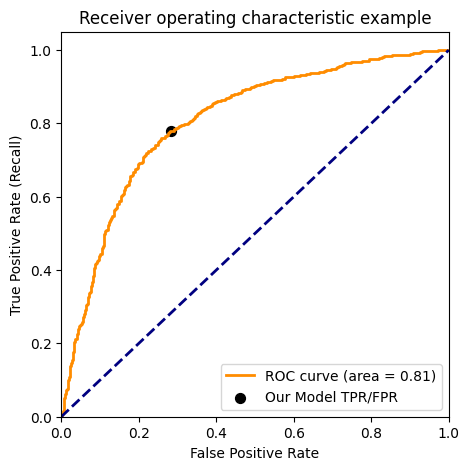

In [ ]:
from sklearn import metrics

# calculate ROC curve and AUC
scores = clf_svm_rbf.decision_function(X_train_t_val)
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, scores)
auc = metrics.auc(fpr, tpr)

# plot ROC curve with black dot for model accuracy
plt.figure(figsize=(5,5))
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.scatter(0.282, 0.779, color='black', label='Our Model TPR/FPR', s=50)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


**4. Tree-Based Model**

4.1 Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from IPython.display import Image
from IPython.display import IFrame
import pydot_ng as pydot

In [ ]:

clf_tree = DecisionTreeClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)
train_accuracy_DT = clf_tree.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_DT = clf_tree.score(X_train_t_val, Y_train_t_val)
test_accuracy_DT = clf_tree.score(X_test_t, Y_test)
print('Train accuracy: %.3f'%train_accuracy_DT)
print('Validation accuracy: %.3f'%val_accuracy_DT)
print('Test accuracy: %.3f'%test_accuracy_DT)

Train accuracy: 0.711
Validation accuracy: 0.704
Test accuracy: 0.686


In [ ]:
d_range = range(1, 13)
tree_accuracy = pd.DataFrame(index=d_range, columns=['Train accuracy', 'Validation accuracy'])

for d in d_range:
    clf_tree = DecisionTreeClassifier(max_depth=d, random_state=0).fit(X_train_t_tr, Y_train_t_tr)
    Y_train_pred_DT = clf_tree.predict(X_train_t_tr)
    train_accuracy = np.mean(Y_train_pred_DT == Y_train_t_tr)
    Y_val_pred_DT = clf_tree.predict(X_train_t_val)
    val_accuracy = np.mean(Y_val_pred_DT == Y_train_t_val)
    tree_accuracy.loc[d, 'Train accuracy'] = train_accuracy.round(2)
    tree_accuracy.loc[d, 'Validation accuracy'] = val_accuracy.round(2)
tree_accuracy.rename_axis('Depth', inplace=True)

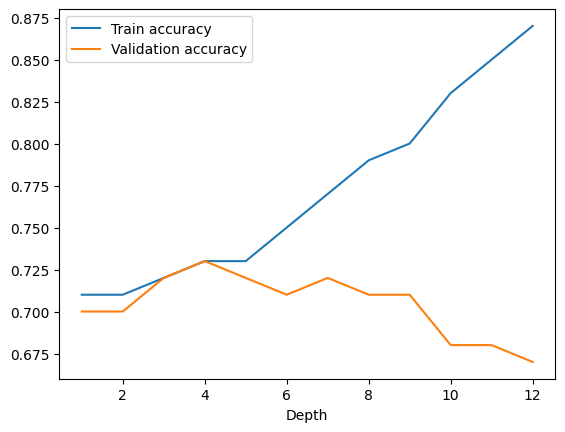

In [ ]:
tree_accuracy.plot();

In [ ]:
param_grid = [{'max_depth':range(1,13),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,6,20,100,10000]}]

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0),
                           param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 13),
                          'max_leaf_nodes': [2, 4, 6, 20, 100, 10000],
                          'min_samples_leaf': [10, 20, 100]}],
             scoring='accuracy')

In [ ]:
# extract the results of the grid search
results = grid_search.cv_results_

# create a dataframe from the results
tree_accuracy_grid = pd.DataFrame({
    'max_depth': results['param_max_depth'],
    'max_leaf_nodes': results['param_max_leaf_nodes'],
    'min_samples_leaf': results['param_min_samples_leaf'],
    'Accuracy': results['mean_test_score']
})
tree_accuracy_grid

,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,1,2,10,0.708938
1,1,2,20,0.708938
2,1,2,100,0.708938
3,1,4,10,0.708938
4,1,4,20,0.708938
...,...,...,...,...
211,12,100,20,0.706745
212,12,100,100,0.715514
213,12,10000,10,0.677909
214,12,10000,20,0.699663


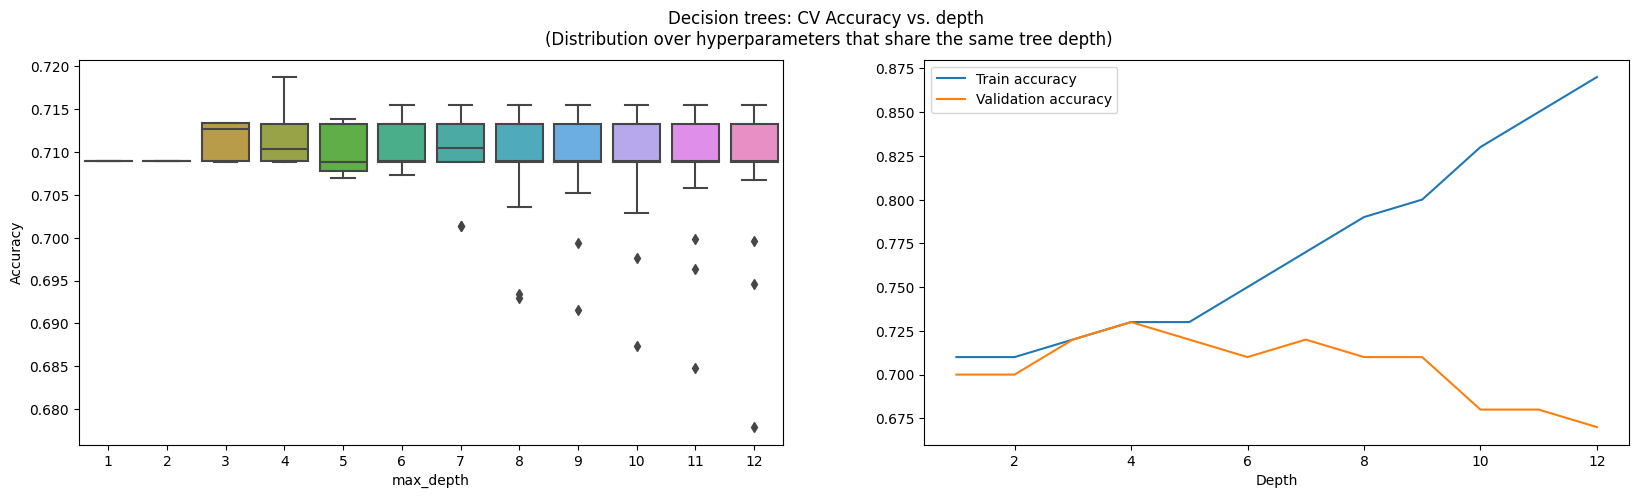

In [ ]:
import seaborn as sns
fig, axes = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('Decision trees: CV Accuracy vs. depth \n(Distribution over hyperparameters that share the same tree depth)')
sns.boxplot(x="max_depth", y='Accuracy', data=tree_accuracy_grid, ax=axes[0]);
tree_accuracy.plot(ax=axes[1]);

# Overfitting while depth increases

In [ ]:
grid_search.best_params_

{'max_depth': 4, 'max_leaf_nodes': 20, 'min_samples_leaf': 100}

In [ ]:
best_DT_model = grid_search.best_estimator_
best_DT_model

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20, min_samples_leaf=100,
                       random_state=0)

In [ ]:
# Compute the training accuracy
train_accuracy_DT_opt = best_DT_model.score(X_train_t_tr, Y_train_t_tr)

# Compute the validation accuracy
val_accuracy_DT_opt = best_DT_model.score(X_train_t_val, Y_train_t_val)

test_accuracy_DT_opt = best_DT_model.score(X_test_t, Y_test)

print('Train accuracy (RF optimized): %.3f'%train_accuracy_DT_opt)
print('Validation accuracy (RF optimized): %.3f'%val_accuracy_DT_opt)
print('Test accuracy (RF optimized): %.3f'%test_accuracy_DT_opt)

Train accuracy (RF optimized): 0.727
Validation accuracy (RF optimized): 0.723
Test accuracy (RF optimized): 0.701


4.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=1, random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [ ]:
rf.fit(X_train_t_tr, Y_train_t_tr)
train_accuracy_RF = rf.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_RF = rf.score(X_train_t_val, Y_train_t_val)
print('Train accuracy: %.3f'%train_accuracy_RF)
print('Validation accuracy: %.3f'%val_accuracy_RF)

Train accuracy: 0.719
Validation accuracy: 0.715


In [ ]:
param_grid = [{'n_estimators':[10,20,50],
               'max_depth':range(1,10),
               'min_samples_leaf':[10,20,100],
               'max_leaf_nodes':[2,4,8,16]}]

grid_search = GridSearchCV(RandomForestClassifier(random_state=0),
                           param_grid,
                           cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=0),
                           scoring='accuracy')

grid_search.fit(X_train_t_tr, Y_train_t_tr)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=0, shuffle=True),
             estimator=RandomForestClassifier(random_state=0),
             param_grid=[{'max_depth': range(1, 10),
                          'max_leaf_nodes': [2, 4, 8, 16],
                          'min_samples_leaf': [10, 20, 100],
                          'n_estimators': [10, 20, 50]}],
             scoring='accuracy')

In [ ]:
rf_accuracy_grid = pd.DataFrame(grid_search.cv_results_)
rf_accuracy_grid = rf_accuracy_grid[['param_n_estimators', 'param_max_depth', 'param_max_leaf_nodes', 'param_min_samples_leaf', 'mean_test_score']]
rf_accuracy_grid = rf_accuracy_grid.rename(columns={
    'param_n_estimators': 'n_estimators',
    'param_max_depth': 'max_depth',
    'param_max_leaf_nodes': 'max_leaf_nodes',
    'param_min_samples_leaf': 'min_samples_leaf',
    'mean_test_score': 'Accuracy'
})
rf_accuracy_grid

,n_estimators,max_depth,max_leaf_nodes,min_samples_leaf,Accuracy
0,10,1,2,10,0.691062
1,20,1,2,10,0.714334
2,50,1,2,10,0.717032
3,10,1,2,20,0.691062
4,20,1,2,20,0.714334
...,...,...,...,...,...
319,20,9,16,20,0.732378
320,50,9,16,20,0.730691
321,10,9,16,100,0.729174
322,20,9,16,100,0.731535


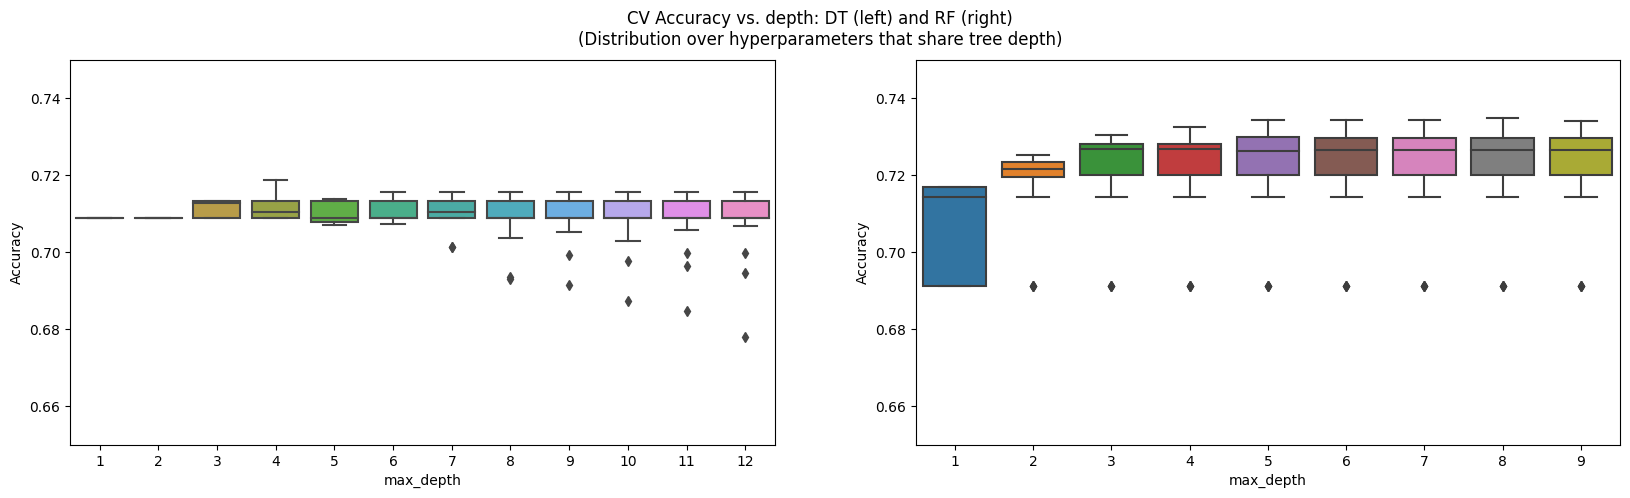

In [ ]:
fig, axes = plt.subplots(1,2,figsize=(20,5))
plt.suptitle('CV Accuracy vs. depth: DT (left) and RF (right)\n(Distribution over hyperparameters that share tree depth)')
sns.boxplot(x="max_depth", y='Accuracy', data=tree_accuracy_grid, ax=axes[0]);
sns.boxplot(x="max_depth", y='Accuracy', data=rf_accuracy_grid, ax=axes[1]);
axes[0].set_ylim(0.65,0.75);axes[1].set_ylim(0.65,0.75);

In [ ]:
# the best configuration
grid_search.best_params_

{'max_depth': 8,
 'max_leaf_nodes': 16,
 'min_samples_leaf': 10,
 'n_estimators': 20}

In [ ]:
# a model trained using the best configuration on all folds
best_RF_model = grid_search.best_estimator_
best_RF_model

RandomForestClassifier(max_depth=8, max_leaf_nodes=16, min_samples_leaf=10,
                       n_estimators=20, random_state=0)

In [ ]:
#best_RF_model.fit(X_train_t_tr, Y_train_t_tr)
# Compute the training accuracy
train_accuracy_RF_opt = best_RF_model.score(X_train_t_tr, Y_train_t_tr)

# Compute the validation accuracy
val_accuracy_RF_opt = best_RF_model.score(X_train_t_val, Y_train_t_val)

test_accuracy_RF_opt = best_RF_model.score(X_test_t, Y_test)

print('Train accuracy (RF optimized): %.3f'%train_accuracy_RF_opt)
print('Validation accuracy (RF optimized): %.3f'%val_accuracy_RF_opt)
print('Test accuracy (RF optimized): %.3f'%test_accuracy_RF_opt)

Train accuracy (RF optimized): 0.739
Validation accuracy (RF optimized): 0.733
Test accuracy (RF optimized): 0.712


In [ ]:
conf_matrix_RF = confusion_matrix(Y_train_t_val, best_RF_model.predict(X_train_t_val))
conf_matrix_RF

array([[636, 289],
       [239, 813]])

In [ ]:
tn, fp, fn, tp = conf_matrix_RF.ravel()
tn, fp, fn, tp
accuracy = (tp+tn)/(tn+fp+fn+tp)
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)
recall = tpr
precision = tp/(tp+fp)
print('False positive rate: %.3f'%fpr)
print('False negative rate: %.3f'%fnr)
print('True negative rate: %.3f'%tpr)

print(tp, fp, tp/(tp+fp))

False positive rate: 0.312
False negative rate: 0.227
True negative rate: 0.773
813 289 0.7377495462794919


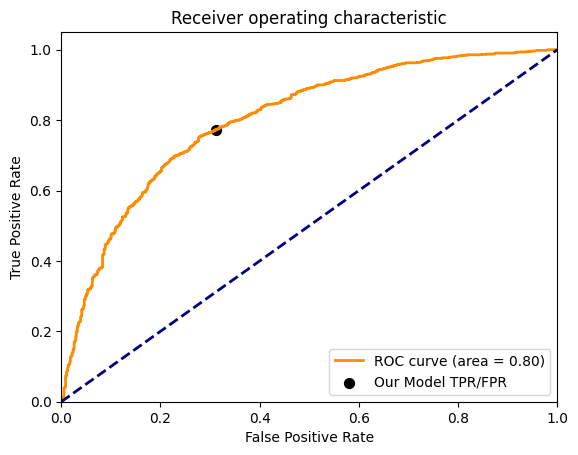

In [ ]:
from sklearn import metrics

y_pred_proba = best_RF_model.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(0.312, 0.773, color='black', label='Our Model TPR/FPR', s=50)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")


4.3 Boosting

In [ ]:
clf_boosting = AdaBoostClassifier(random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [ ]:
train_accuracy_boosting =  clf_boosting.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_boosting = clf_boosting.score(X_train_t_val, Y_train_t_val)

In [ ]:
print('Train accuracy (boosting): %.3f'%train_accuracy_boosting)
print('Validation accuracy (boosting): %.3f'%val_accuracy_boosting)
print('\nTrain accuracy (RF optimized): %.3f'%train_accuracy_RF_opt)
print('Validation accuracy (RF optimized): %.3f'%val_accuracy_RF_opt)
print('\nTrain accuracy (DT): %.3f'%train_accuracy_DT)
print('Validation accuracy (DT): %.3f'%val_accuracy_DT)

Train accuracy (boosting): 0.748
Validation accuracy (boosting): 0.741

Train accuracy (RF optimized): 0.739
Validation accuracy (RF optimized): 0.733

Train accuracy (DT): 0.711
Validation accuracy (DT): 0.704


In [ ]:
n_estimators_ensemble = list(range(10, 200, 10))
boosting_accuracy_learning_rate_0_01 = pd.DataFrame(index=n_estimators_ensemble, columns=['Train accuracy', 'Validation accuracy'])

for n in n_estimators_ensemble:

    boosting_model = AdaBoostClassifier(n_estimators=n, random_state=0, learning_rate=0.01)

    boosting_model.fit(X_train_t_tr, Y_train_t_tr)

    # Compute the training accuracy
    train_accuracy = boosting_model.score(X_train_t_tr, Y_train_t_tr)

    # Compute the validation accuracy
    val_accuracy = boosting_model.score(X_train_t_val, Y_train_t_val)

    boosting_accuracy_learning_rate_0_01.loc[n] = [train_accuracy.round(2), val_accuracy.round(2)]

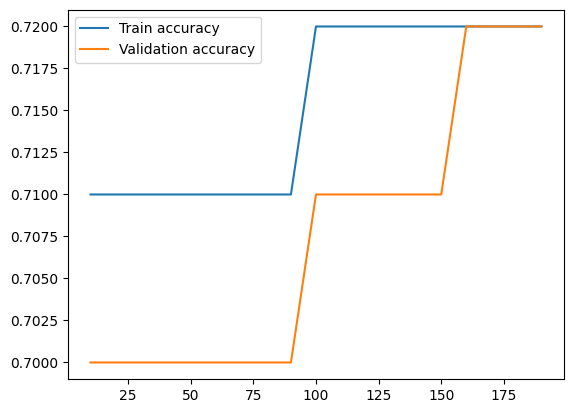

In [ ]:
boosting_accuracy_learning_rate_0_01.plot();

In [ ]:
n_estimators_ensemble = list(range(10, 400, 10))
boosting_accuracy_learning_rate_1 = pd.DataFrame(index=n_estimators_ensemble, columns=['Train accuracy', 'Validation accuracy'])

for n in n_estimators_ensemble:

    boosting_model = AdaBoostClassifier(n_estimators=n, random_state=0, learning_rate=1)

    boosting_model.fit(X_train_t_tr, Y_train_t_tr)

    # Compute the training accuracy
    train_accuracy = boosting_model.score(X_train_t_tr, Y_train_t_tr)

    # Compute the validation accuracy
    val_accuracy = boosting_model.score(X_train_t_val, Y_train_t_val)

    boosting_accuracy_learning_rate_1.loc[n] = [train_accuracy.round(2), val_accuracy.round(2)]

<Axes: >

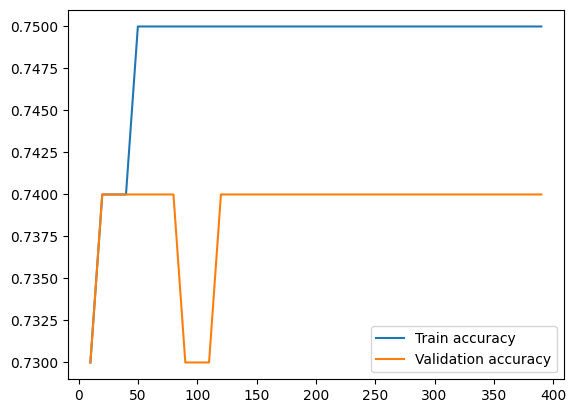

In [ ]:
boosting_accuracy_learning_rate_1.plot()

In [ ]:
clf_boosting_opt = AdaBoostClassifier(n_estimators=80, random_state=0).fit(X_train_t_tr, Y_train_t_tr)

In [ ]:
train_accuracy_boosting_opt =  clf_boosting_opt.score(X_train_t_tr, Y_train_t_tr)
val_accuracy_boosting_opt = clf_boosting_opt.score(X_train_t_val, Y_train_t_val)
test_accuracy_boosting_opt = clf_boosting_opt.score(X_test_t, Y_test)

In [ ]:
print('Train accuracy (boosting): %.3f'%train_accuracy_boosting_opt)
print('Validation accuracy (boosting): %.3f'%val_accuracy_boosting_opt)
print('Test accuracy (boosting): %.3f'%test_accuracy_boosting_opt)

Train accuracy (boosting): 0.747
Validation accuracy (boosting): 0.735
Test accuracy (boosting): 0.712


**5. KNN**

In [ ]:
knn     = neighbors.KNeighborsClassifier().fit(X_train_t_tr, Y_train_t_tr)
from sklearn.metrics import accuracy_score

print('KNN train accuracy: %.3f'%accuracy_score(Y_train_t_tr, knn.predict(X_train_t_tr)))
print('KNN val accuracy: %.3f'%accuracy_score(Y_train_t_val, knn.predict(X_train_t_val)))
print('KNN test accuracy: %.3f'%accuracy_score(Y_test, knn.predict(X_test_t)))

KNN train accuracy: 0.795
KNN val accuracy: 0.702
KNN test accuracy: 0.685


In [ ]:
# K tuning

knn = neighbors.KNeighborsClassifier()
param_grid = {'n_neighbors': range(1,30), 'metric': ['euclidean', 'manhattan']}
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_t, Y_train)

knn_best = grid_search.best_estimator_
print("Optimum k value:", grid_search.best_params_['n_neighbors'])
print('KNN best train accuracy:', knn_best.score(X_train_t_tr, Y_train_t_tr))
print('KNN best validation accuracy:', knn_best.score(X_train_t_val, Y_train_t_val))
accuracy = accuracy_score(Y_test, knn_best.predict(X_test_t))
print('KNN best test accuracy:', accuracy)


Optimum k value: 27
KNN best train accuracy: 0.7480607082630691
KNN best validation accuracy: 0.7567020738492666
KNN best test accuracy: 0.7077789150460594


In [ ]:
conf_matrix_KNN = confusion_matrix(Y_train_t_val, knn_best.predict(X_train_t_val))
conf_matrix_KNN

array([[666, 259],
       [222, 830]])

In [ ]:
tn, fp, fn, tp = conf_matrix_KNN.ravel()
tn, fp, fn, tp
accuracy = (tp+tn)/(tn+fp+fn+tp)
tpr = tp/(tp+fn)
fpr = fp/(fp+tn)
tnr = tn/(tn+fp)
fnr = fn/(fn+tp)
recall = tpr
precision = tp/(tp+fp)
print('False positive rate: %.3f'%fpr)
print('False negative rate: %.3f'%fnr)
print('True negative rate: %.3f'%tpr)

print(tp, fp, tp/(tp+fp))

False positive rate: 0.280
False negative rate: 0.211
True negative rate: 0.789
830 259 0.7621671258034894


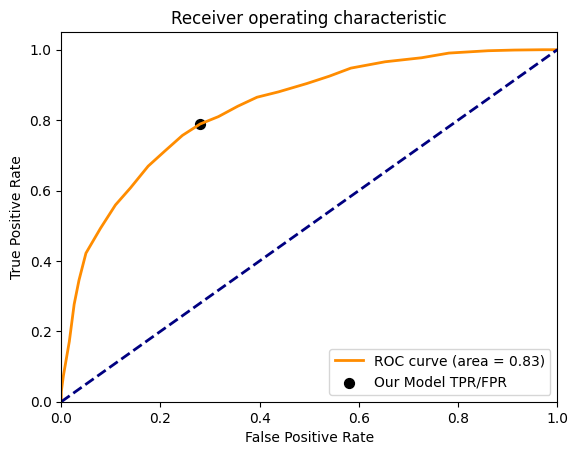

In [ ]:
y_pred_proba = knn_best.predict_proba(X_train_t_val)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(Y_train_t_val, y_pred_proba)
roc_auc = metrics.auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(0.280, 0.789, color='black', label='Our Model TPR/FPR', s=50)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right");